In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class vortex(object):
    '''Vortex element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize vortex given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to vortex and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = (self.C / (2 * np.pi)) * -y_rel / rsq
        v = (self.C / (2 * np.pi)) * x_rel / rsq
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [3]:
class sourcesink(object):
    '''Source/sink element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize source/sink given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to source/sink and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.x0
        rsq = x_rel**2 + y_rel**2
        u = (self.C / (2 * np.pi)) * x_rel / rsq
        v = (self.C / (2* np.pi)) * y_rel / rsq
        return np.stack((u,v), axis = -1)

In [4]:
class uniform(object):
    '''Uniform flow element for potential flow calculation'''
    def __init__(self, C):
        '''Initialize uniform flow given strength and location'''
        self.C = C
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        u = self.C * np.ones_like(x)
        v = self.C * np.ones_like(x)
        return np.stack((u,v), axis = -1)

In [5]:
class doublet(object):
    '''Power law with n = -1 in Az^n for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize doublet power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        rev = y_rel**2 - x_rel**2
        u = (self.C * rev) / rsq**2
        v = (-self.C * 2 * x_rel * y_rel) / rsq**2
        return np.stack((u,v), axis = -1)

In [6]:
class hexagonal(object):
    '''Power law with n = 3 in Az^n element for the potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize hexagonal power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = 3 * rsq
        v = 6 * x_rel * y_rel
        return np.stack((u,v), axis = -1)

In [7]:
x = np.linspace(0,10,8)
y = np.linspace(0,10,8)
X, Y = np.meshgrid(x,y)

In [14]:
vtx0 = vortex(3, 1, 4)
vtx1 = vortex(4, 8, 5)
src = sourcesink(2, 6, 5)
snk = sourcesink(-4, 5, 4)
dbt = doublet(-3,5,7)
UV = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + snk(X,Y) + dbt(X,Y) 

Text(0, 0.5, 'Generic y-axis')

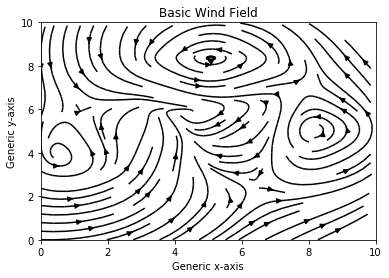

In [15]:
fig, ax = plt.subplots()
ax.streamplot(x,y,UV[:,:,0], UV[...,1],color = 'k') #ellipsis indicates as many : as needed
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Basic Wind Field')
plt.xlabel('Generic x-axis')
plt.ylabel('Generic y-axis')